In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [2]:
data=pd.read_csv(r"C:\Users\Ganji Bhaskar\Downloads\train.csv\train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [37]:
# Initial data exploration
print(data.head())
print(data.dtypes)

# Separate features and target

   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473

In [38]:
label_mapping = {
    'Insufficient_Weight': 1,
    'Normal_Weight': 2,
    'Overweight_Level_I': 3,
    'Overweight_Level_II': 4,
    'Obesity_Type_I': 5,
    'Obesity_Type_II': 6,
    'Obesity_Type_III': 7
}


In [39]:
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad'].map(label_mapping)


In [68]:
import seaborn as sns

In [41]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1524106078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data[i].value_counts(),palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1524106078.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data[i].value_counts(),palette=sns.color_palette())


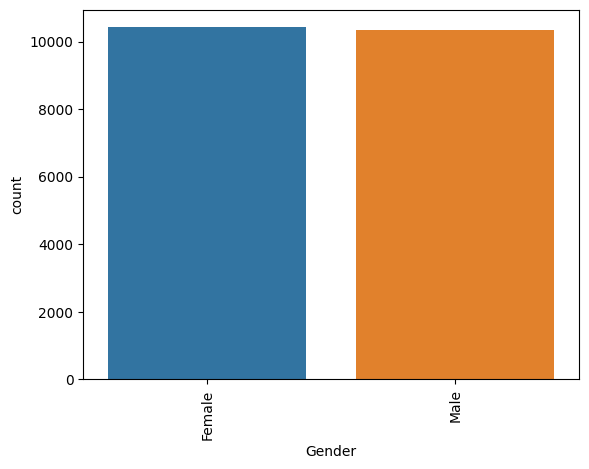

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1524106078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data[i].value_counts(),palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1524106078.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data[i].value_counts(),palette=sns.color_palette())


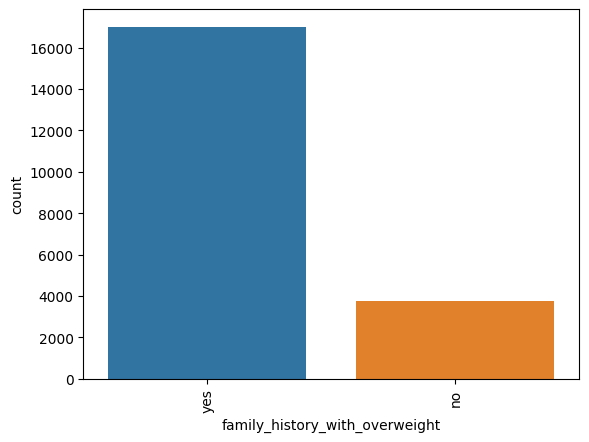

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1524106078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data[i].value_counts(),palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1524106078.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data[i].value_counts(),palette=sns.color_palette())


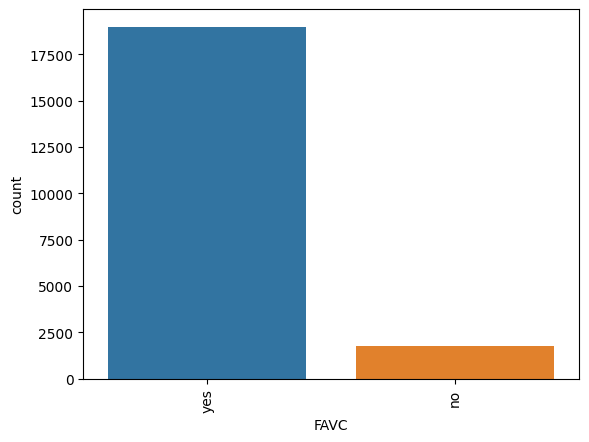

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1524106078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data[i].value_counts(),palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1524106078.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(data[i].value_counts(),palette=sns.color_palette())


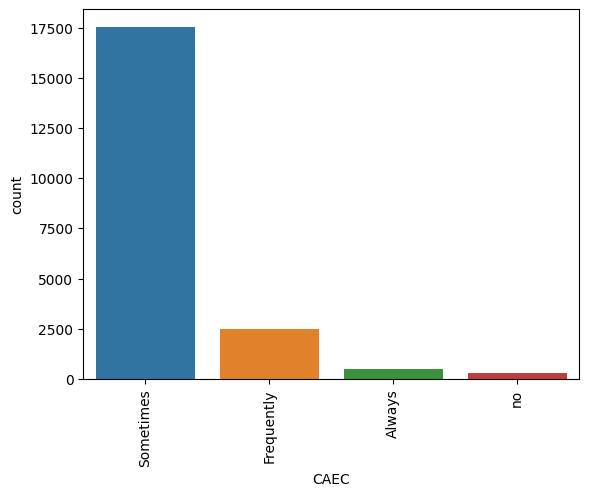

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1524106078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data[i].value_counts(),palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1524106078.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data[i].value_counts(),palette=sns.color_palette())


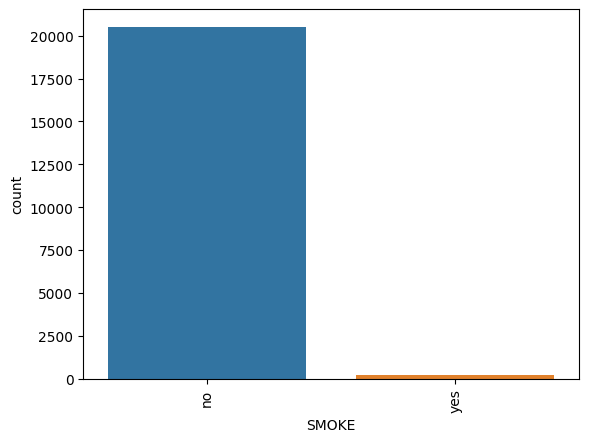

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1524106078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data[i].value_counts(),palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1524106078.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data[i].value_counts(),palette=sns.color_palette())


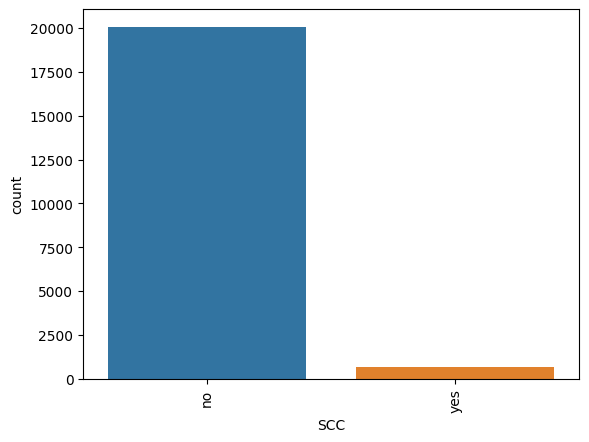

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1524106078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data[i].value_counts(),palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1524106078.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data[i].value_counts(),palette=sns.color_palette())


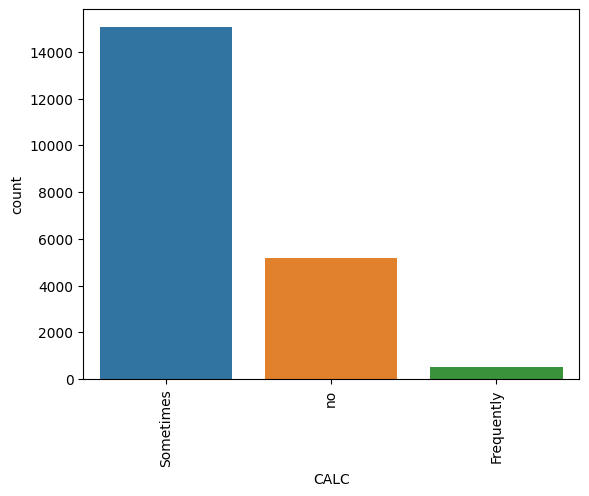

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1524106078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data[i].value_counts(),palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1524106078.py:2: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data[i].value_counts(),palette=sns.color_palette())


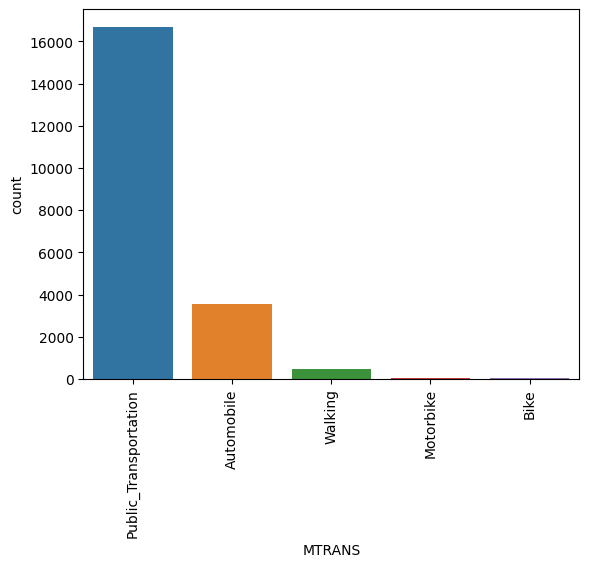

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1524106078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data[i].value_counts(),palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1524106078.py:2: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(data[i].value_counts(),palette=sns.color_palette())


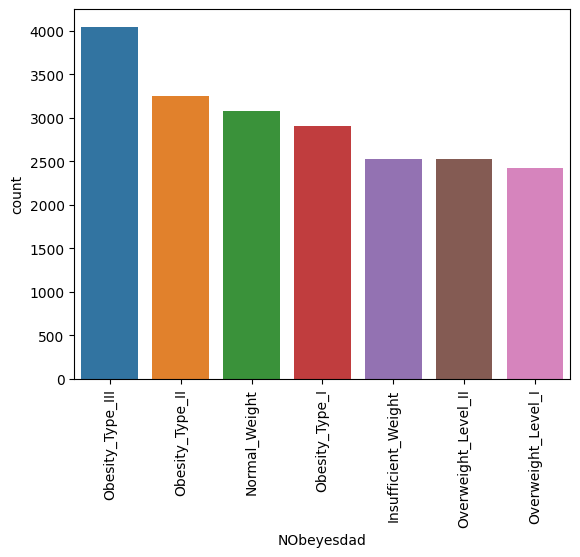

In [69]:
for i in data.select_dtypes("object").columns:
    sns.barplot(data[i].value_counts(),palette=sns.color_palette())
    plt.xticks(rotation=90)
    plt.show()

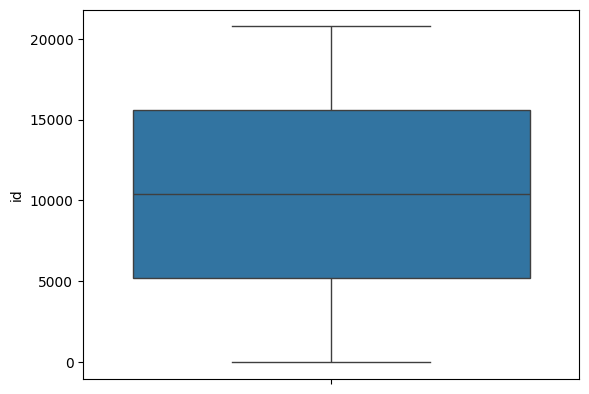

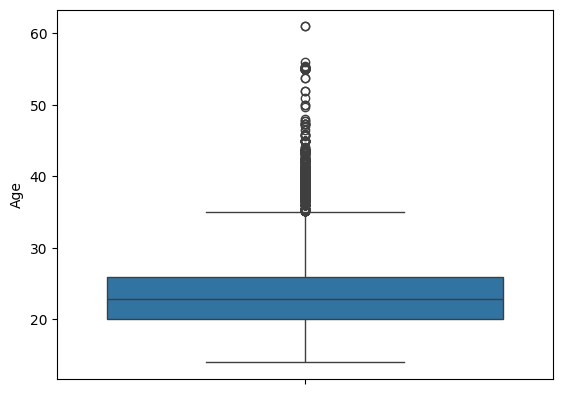

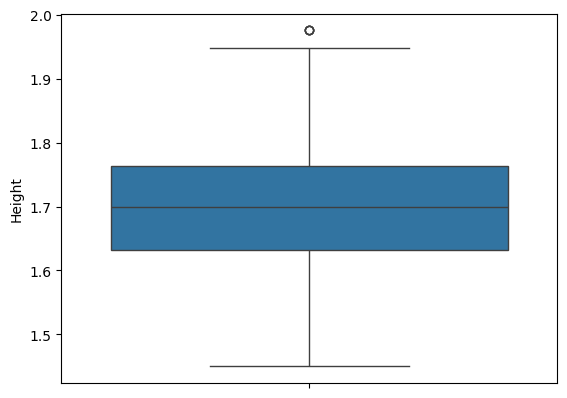

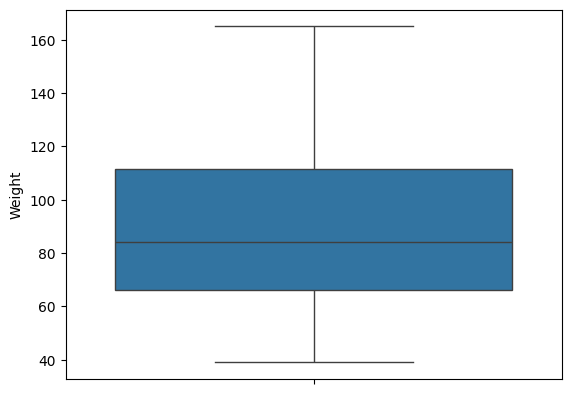

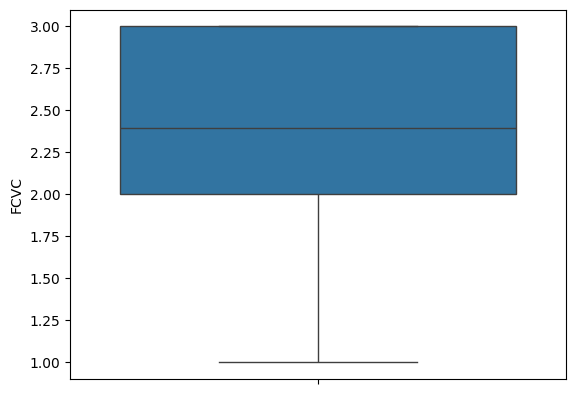

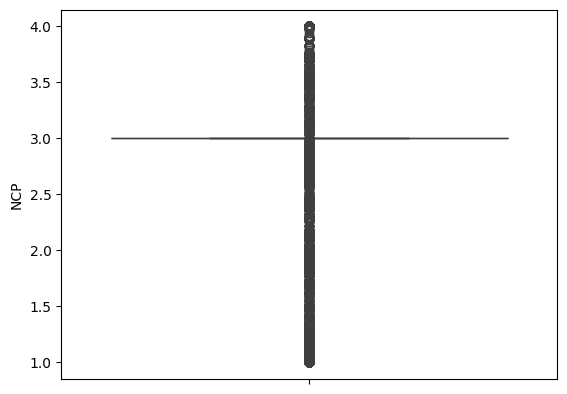

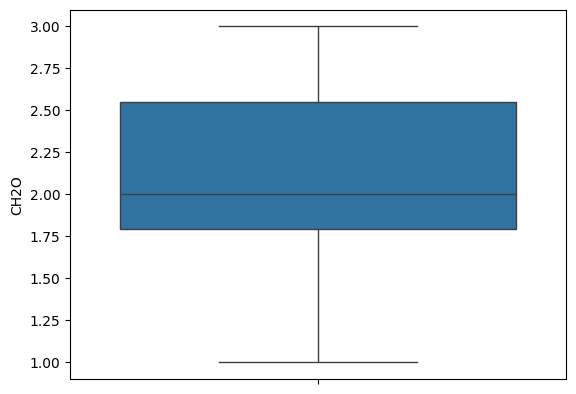

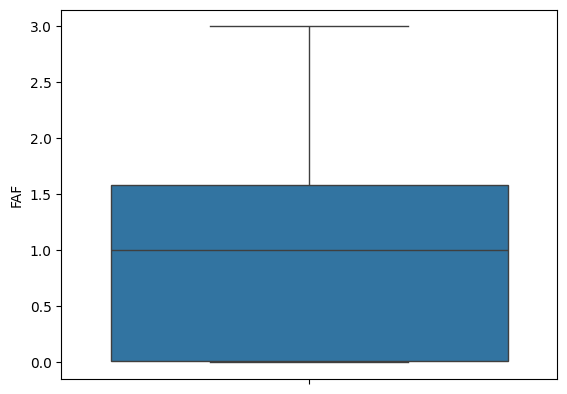

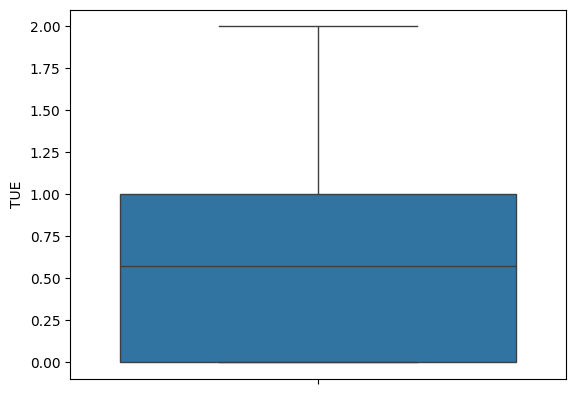

In [72]:
for i in data.select_dtypes(exclude="object").columns:
    sns.boxplot(data[i])
    plt.xticks(rotation=90)
    plt.show()

   Gender            id
0  Female  10384.005085
1    Male  10372.949110


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


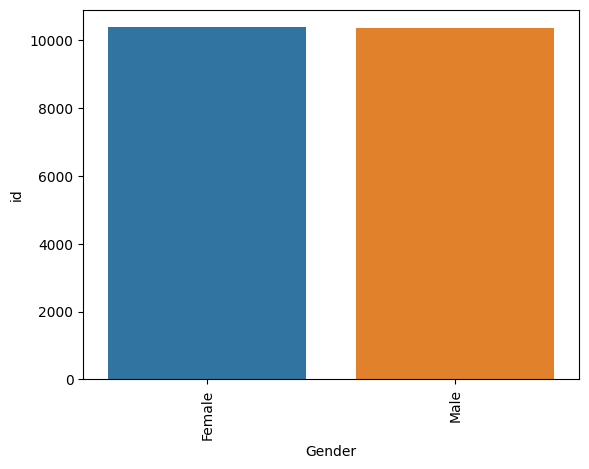

   Gender        Age
0  Female  23.464952
1    Male  24.221793


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


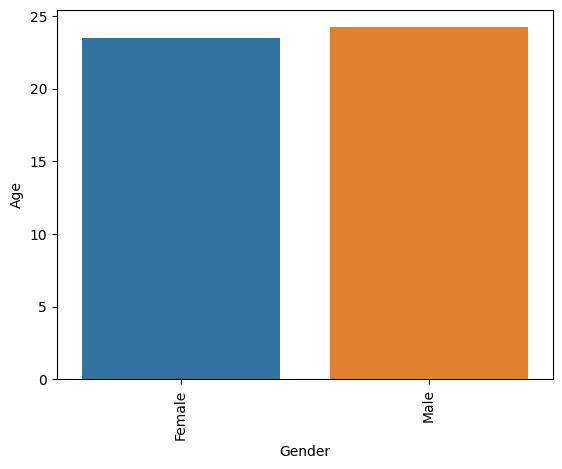

   Gender    Height
0  Female  1.646032
1    Male  1.754909


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


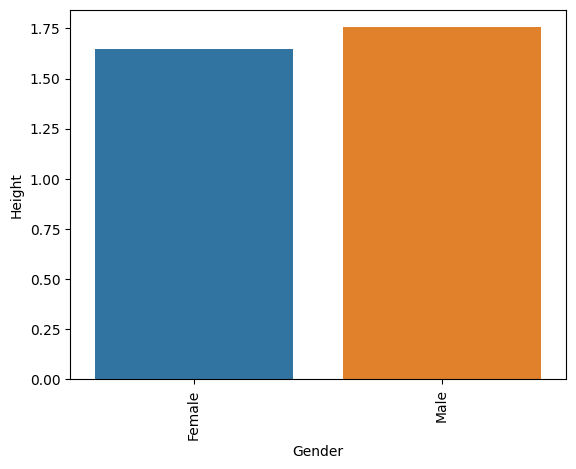

   Gender     Weight
0  Female  84.771838
1    Male  91.029625


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


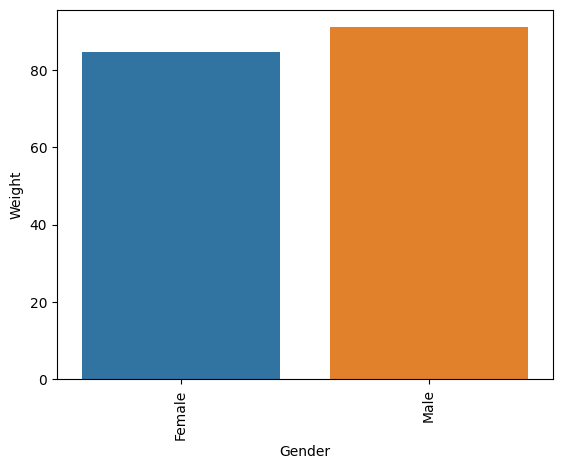

   Gender      FCVC
0  Female  2.611987
1    Male  2.278448


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


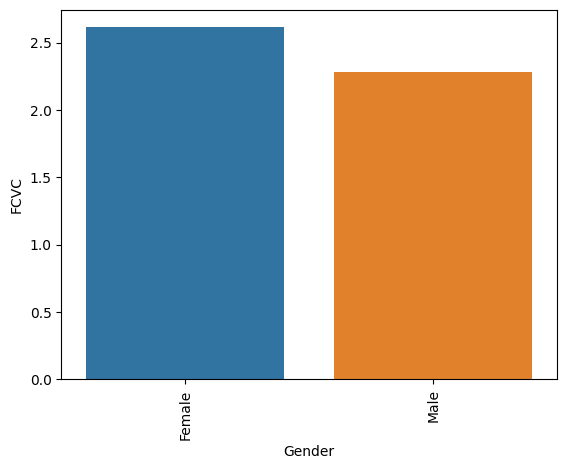

   Gender       NCP
0  Female  2.733608
1    Male  2.789287


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


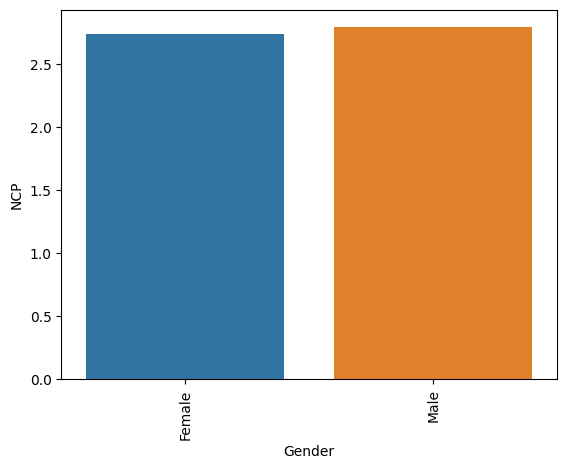

   Gender      CH2O
0  Female  1.997123
1    Male  2.061982


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


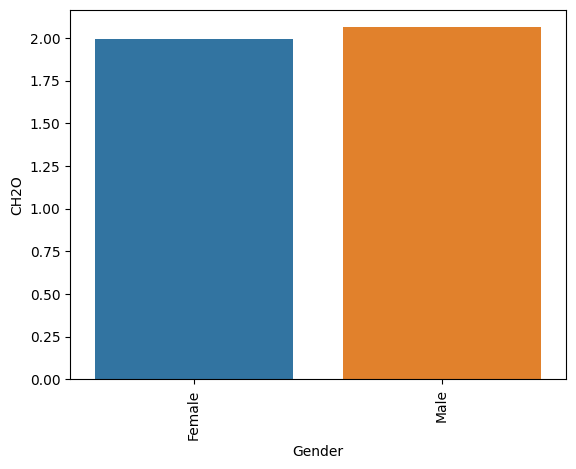

   Gender       FAF
0  Female  0.782727
1    Male  1.182422


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


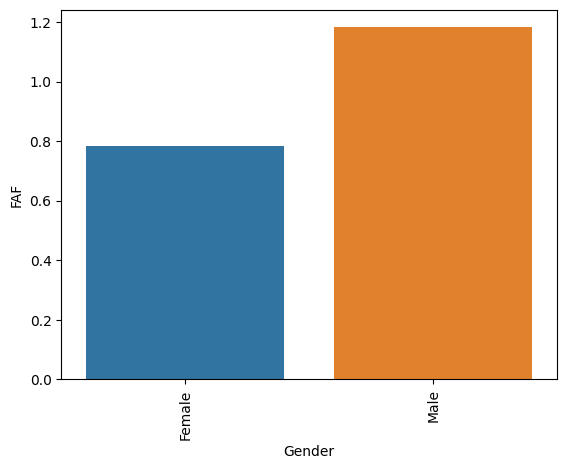

   Gender       TUE
0  Female  0.581562
1    Male  0.652243


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


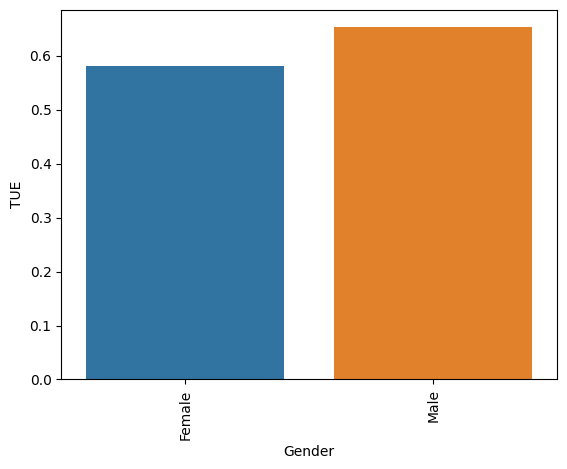

  family_history_with_overweight            id
0                             no  10244.603365
1                            yes  10407.964500


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


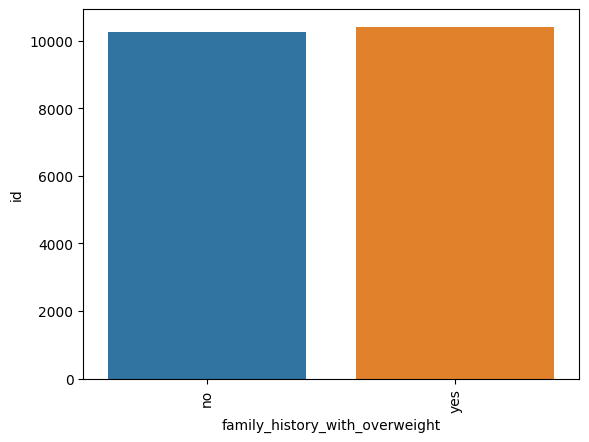

  family_history_with_overweight        Age
0                             no  20.670143
1                            yes  24.539741


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


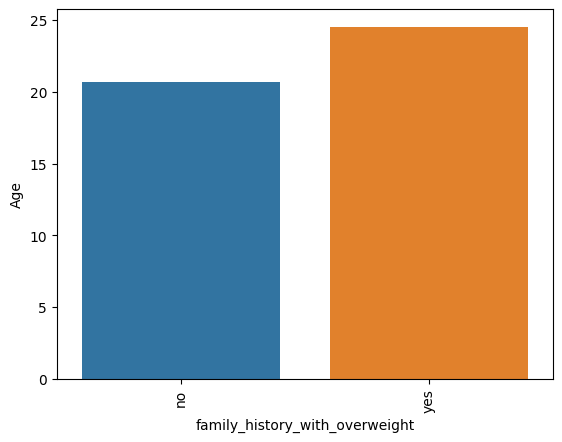

  family_history_with_overweight    Height
0                             no  1.657784
1                            yes  1.709589


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


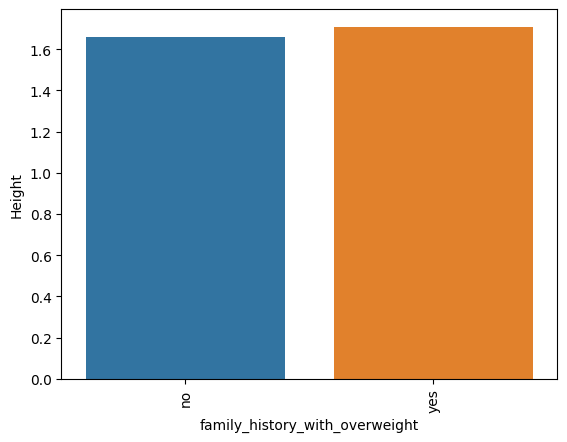

  family_history_with_overweight     Weight
0                             no  58.975793
1                            yes  94.249966


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


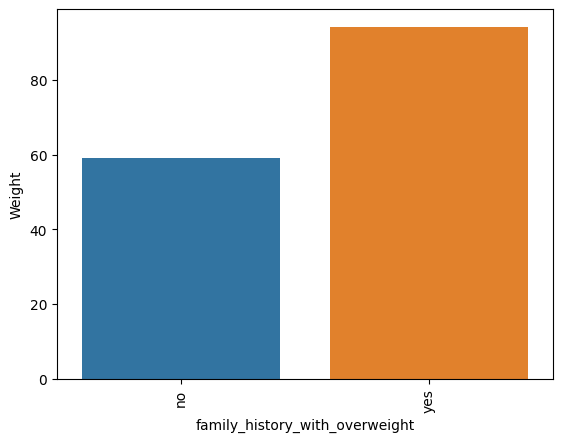

  family_history_with_overweight      FCVC
0                             no  2.391626
1                            yes  2.457854


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


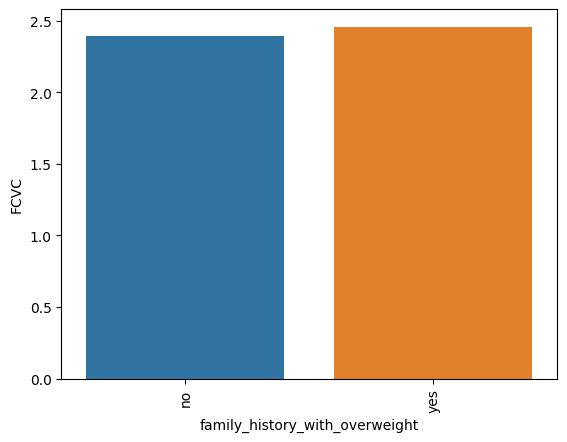

  family_history_with_overweight       NCP
0                             no  2.694003
1                            yes  2.776148


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


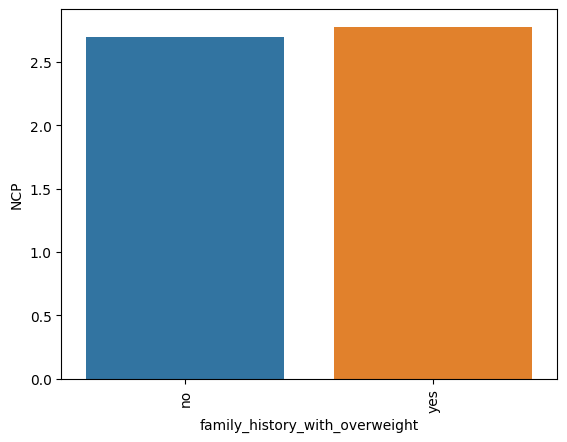

  family_history_with_overweight      CH2O
0                             no  1.780916
1                            yes  2.084102


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


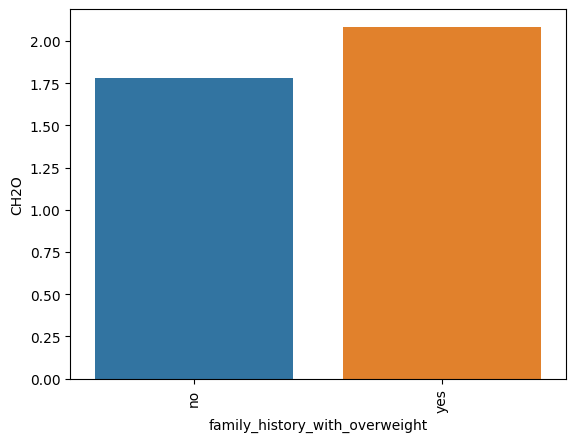

  family_history_with_overweight       FAF
0                             no  1.150465
1                            yes  0.944619


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


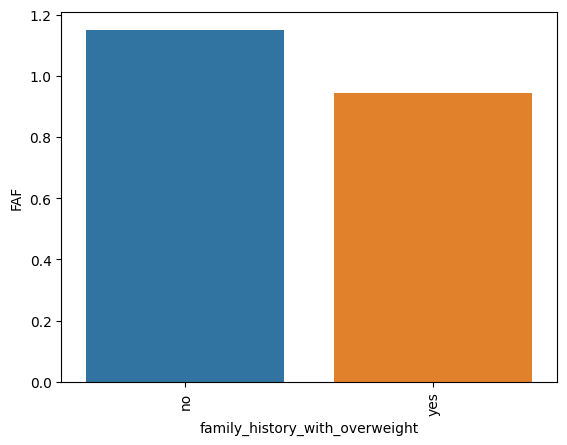

  family_history_with_overweight       TUE
0                             no  0.609361
1                            yes  0.618384


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


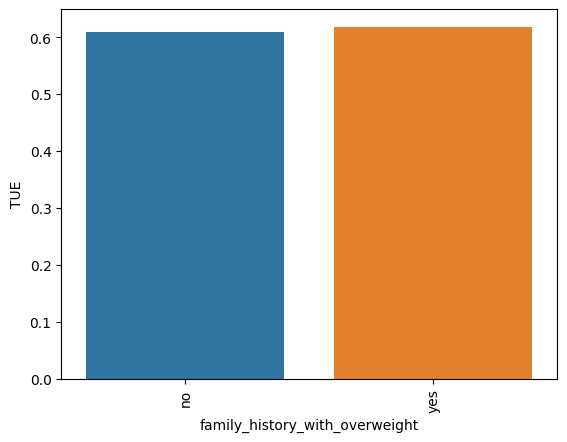

  FAVC            id
0   no  10297.087838
1  yes  10386.117111


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


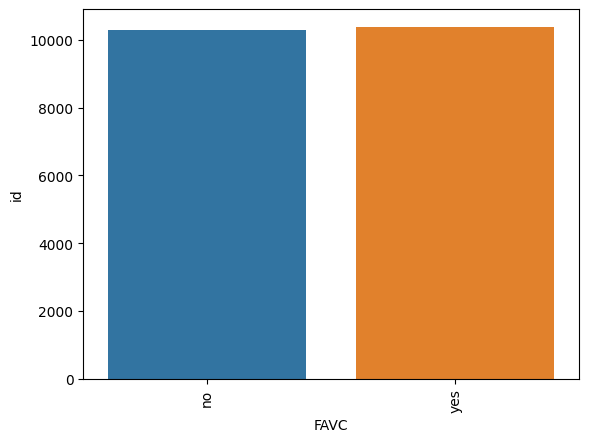

  FAVC        Age
0   no  22.784691
1  yes  23.940710


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


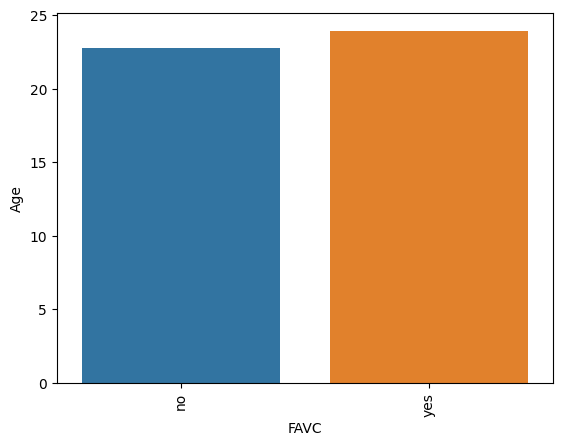

  FAVC    Height
0   no  1.667258
1  yes  1.703331


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


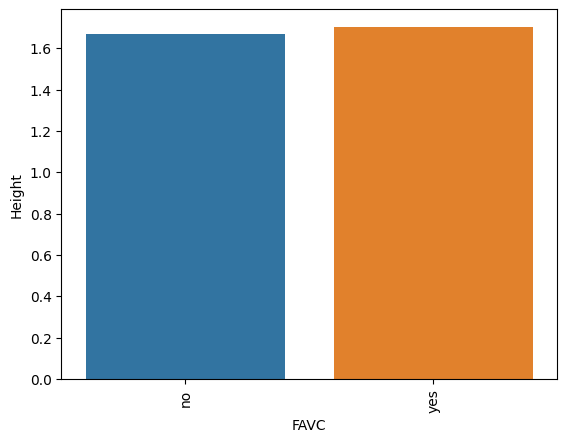

  FAVC     Weight
0   no  68.158798
1  yes  89.733657


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


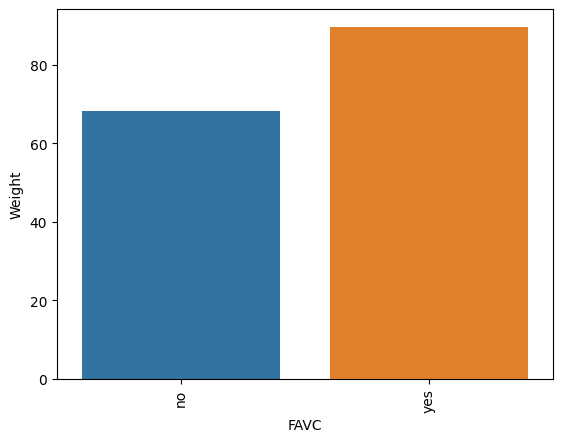

  FAVC      FCVC
0   no  2.433789
1  yes  2.447042


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


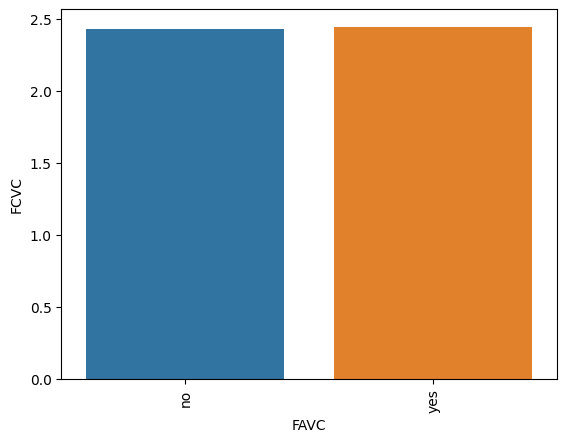

  FAVC       NCP
0   no  2.734762
1  yes  2.763818


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


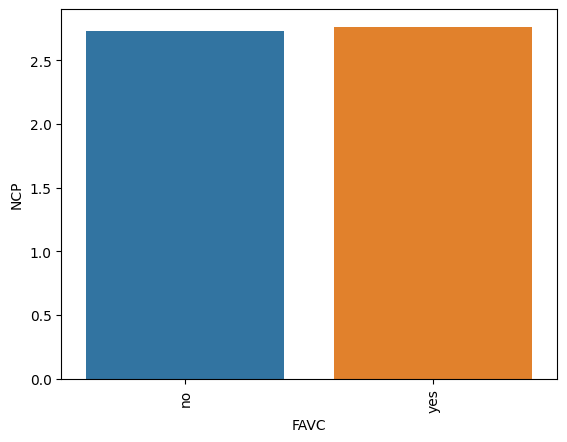

  FAVC      CH2O
0   no  1.951509
1  yes  2.036708


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


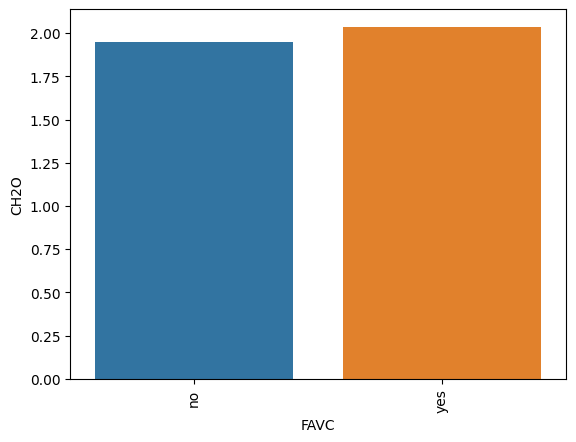

  FAVC       FAF
0   no  1.165445
1  yes  0.964559


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


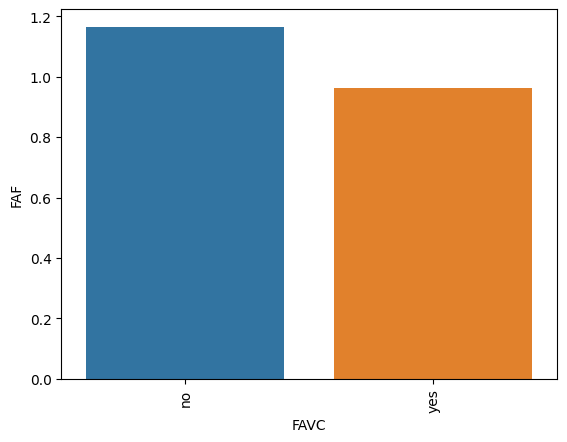

  FAVC       TUE
0   no  0.548171
1  yes  0.623173


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


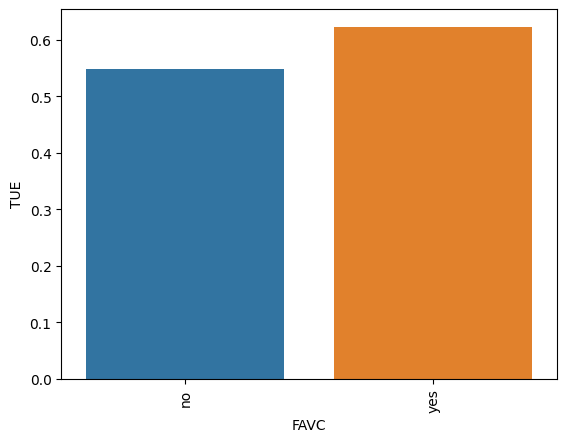

         CAEC            id
0      Always  10560.133891
1  Frequently  10295.144822
2   Sometimes  10381.085344
3          no  10643.426523


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


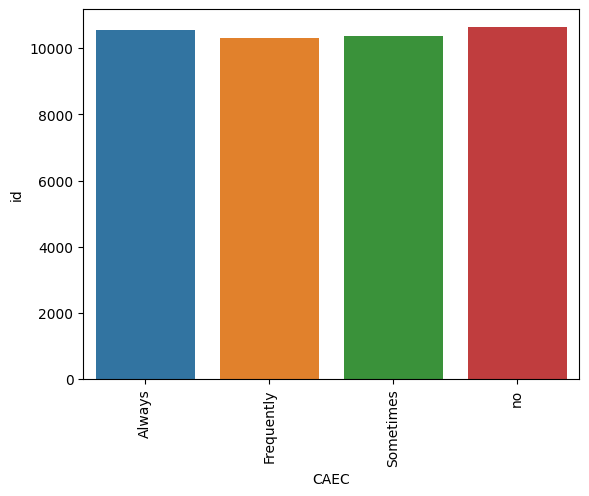

         CAEC        Age
0      Always  22.150628
1  Frequently  20.964648
2   Sometimes  24.333443
3          no  21.342797


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


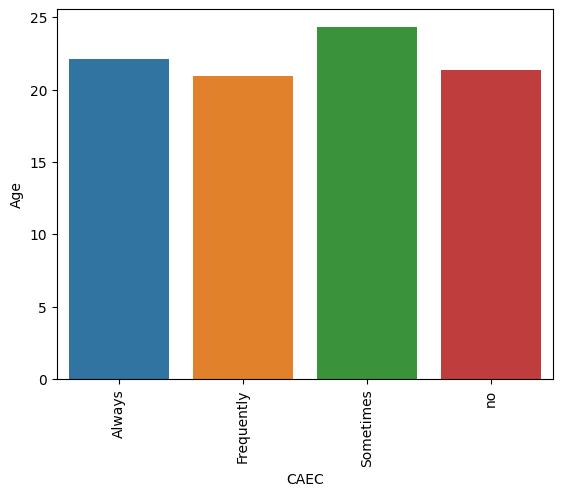

         CAEC    Height
0      Always  1.690953
1  Frequently  1.674530
2   Sometimes  1.705054
3          no  1.641841


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


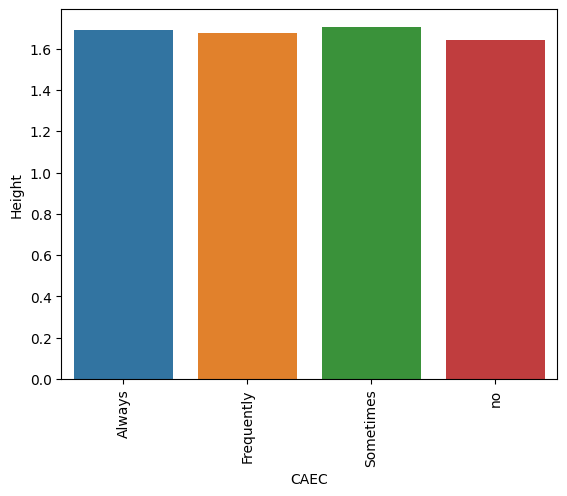

         CAEC     Weight
0      Always  69.520562
1  Frequently  59.316197
2   Sometimes  92.717240
3          no  69.080046


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


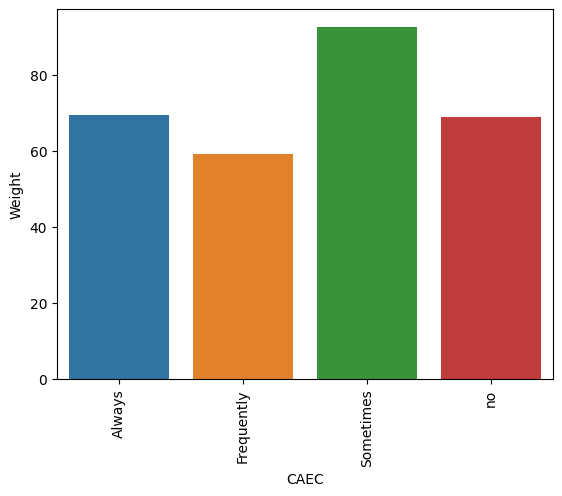

         CAEC      FCVC
0      Always  2.343096
1  Frequently  2.468488
2   Sometimes  2.451032
3          no  2.100059


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


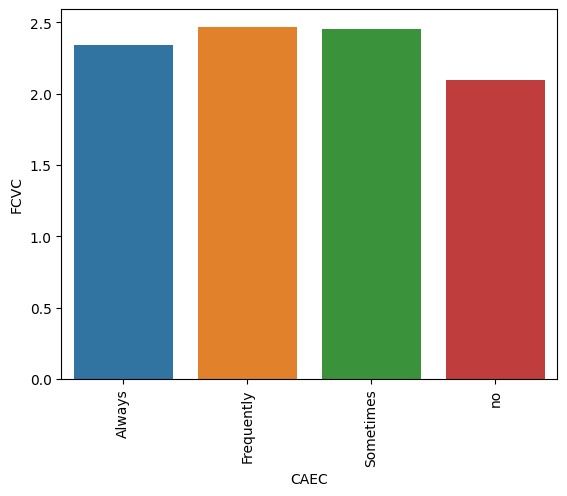

         CAEC       NCP
0      Always  2.899582
1  Frequently  2.865586
2   Sometimes  2.754358
3          no  2.038959


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


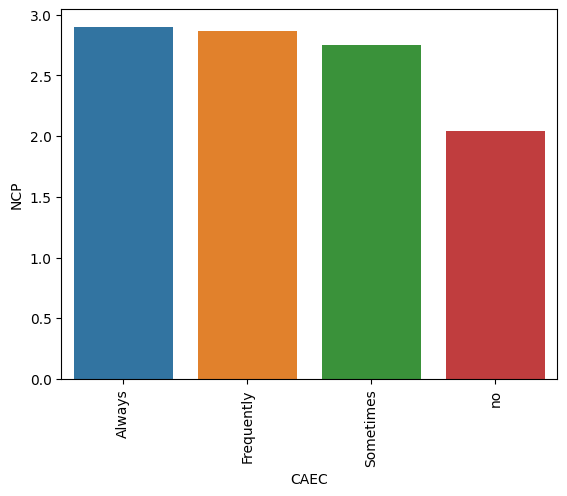

         CAEC      CH2O
0      Always  1.979079
1  Frequently  1.769618
2   Sometimes  2.063840
3          no  2.254902


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


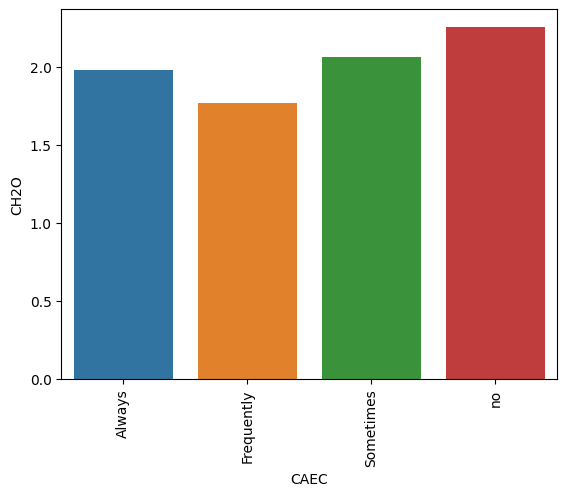

         CAEC       FAF
0      Always  1.252966
1  Frequently  1.183228
2   Sometimes  0.943756
3          no  1.118794


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


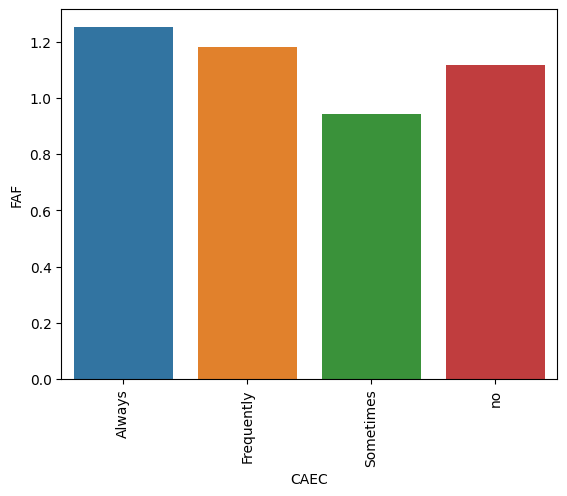

         CAEC       TUE
0      Always  0.686192
1  Frequently  0.671340
2   Sometimes  0.611575
3          no  0.339673


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


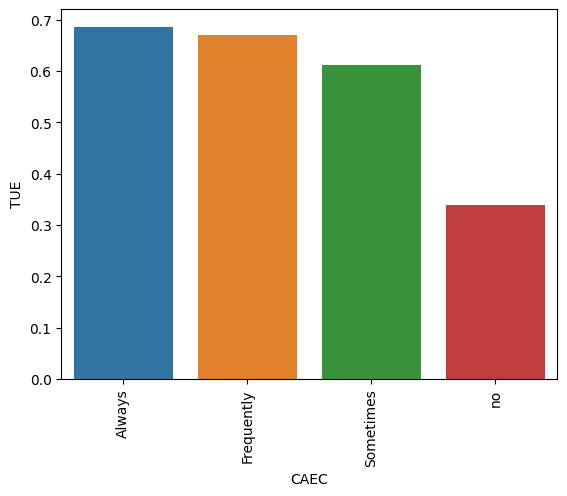

  SMOKE            id
0    no  10370.939892
1   yes  11011.481633


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


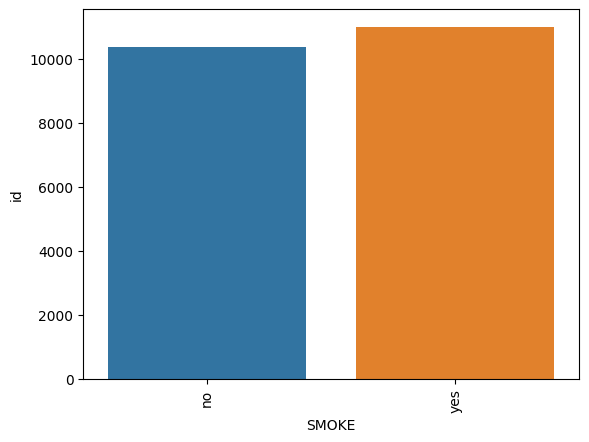

  SMOKE        Age
0    no  23.806990
1   yes  26.756709


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


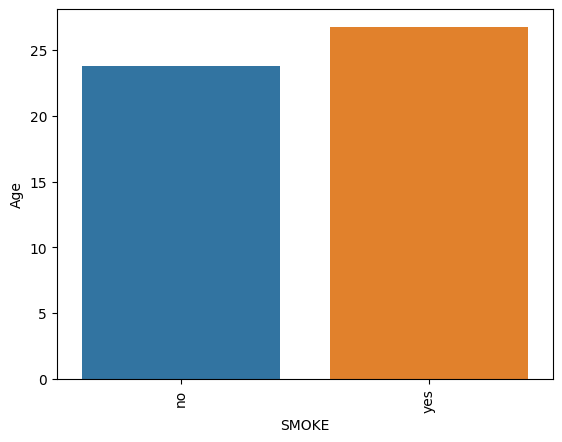

  SMOKE    Height
0    no  1.699579
1   yes  1.755967


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


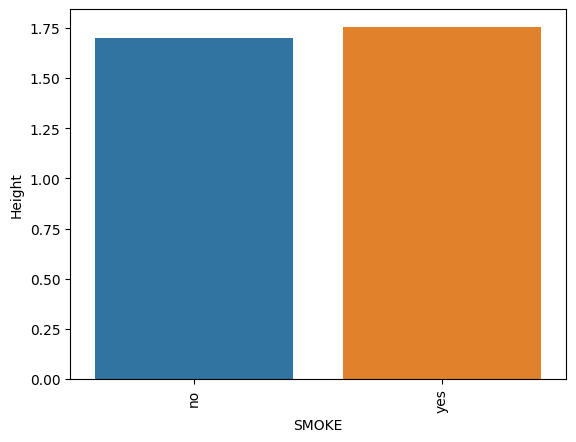

  SMOKE     Weight
0    no  87.771256
1   yes  97.642970


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


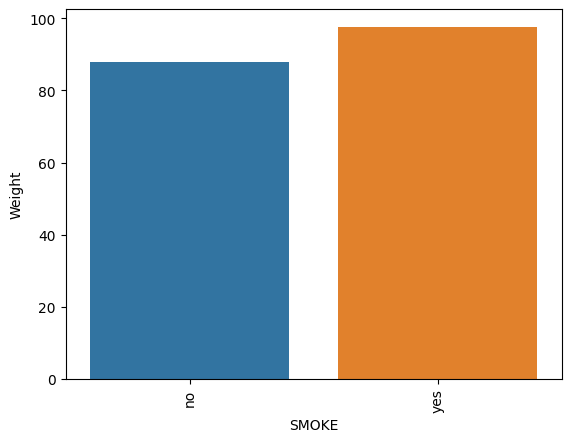

  SMOKE      FCVC
0    no  2.446619
1   yes  2.386429


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


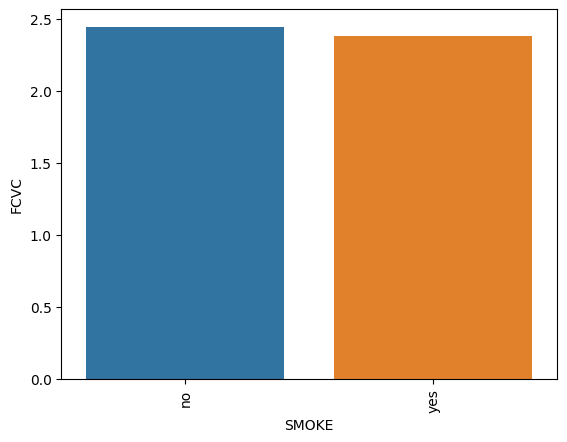

  SMOKE       NCP
0    no  2.760807
1   yes  2.805348


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


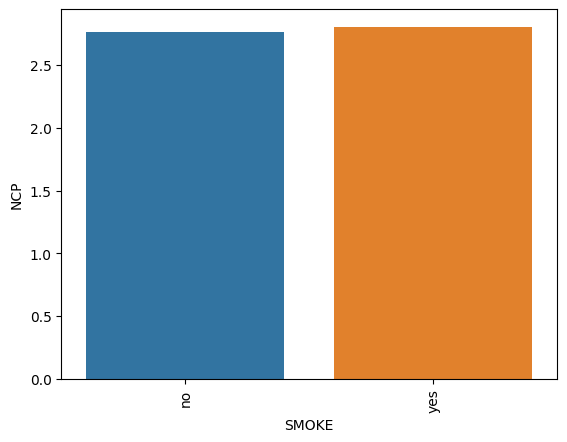

  SMOKE      CH2O
0    no  2.030979
1   yes  1.898722


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


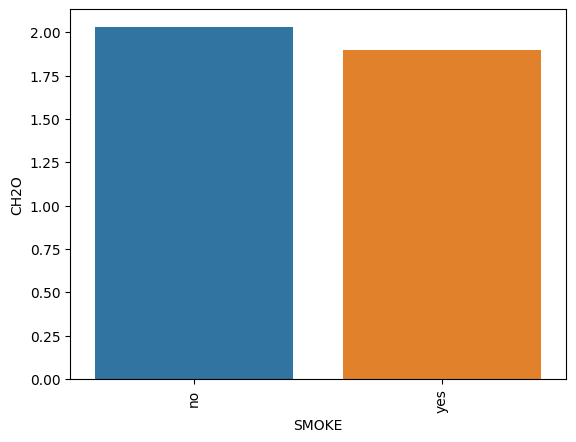

  SMOKE       FAF
0    no  0.980979
1   yes  1.045979


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


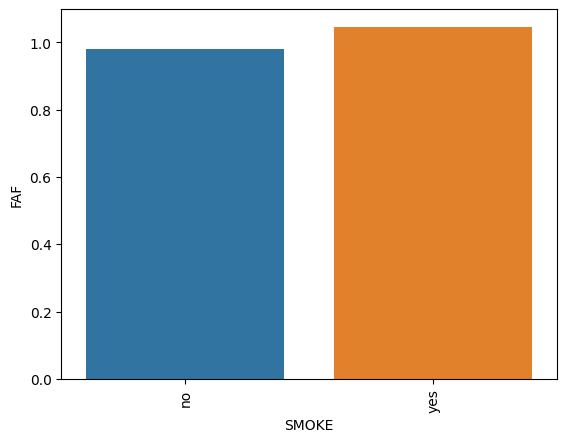

  SMOKE       TUE
0    no  0.617815
1   yes  0.528093


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


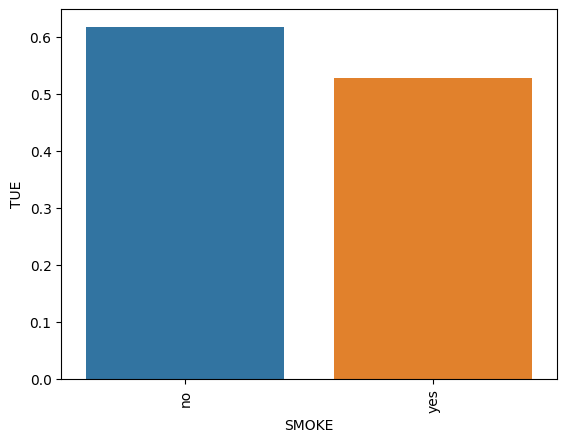

   SCC            id
0   no  10390.874246
1  yes  10016.981077


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


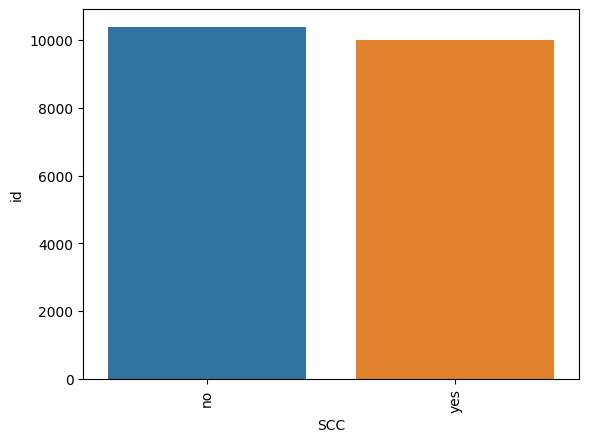

   SCC        Age
0   no  23.956355
1  yes  20.495162


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


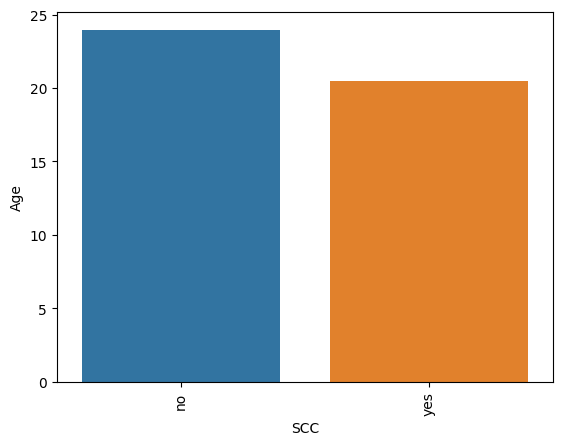

   SCC    Height
0   no  1.701794
1  yes  1.654977


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


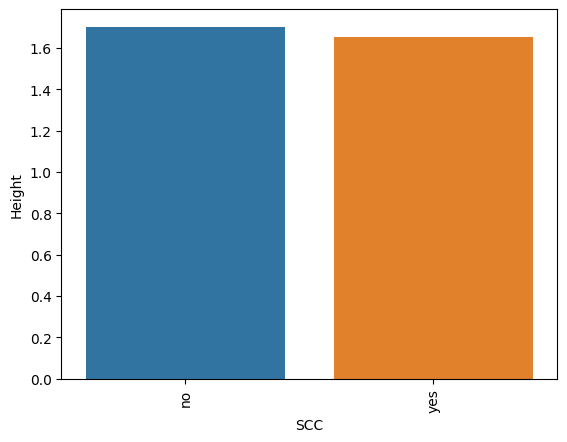

   SCC     Weight
0   no  88.791196
1  yes  61.493733


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


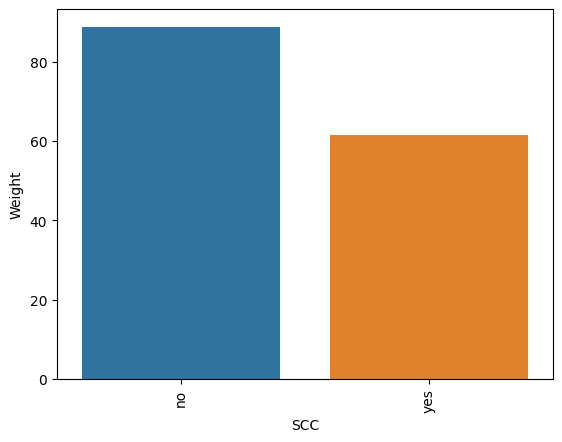

   SCC      FCVC
0   no  2.443726
1  yes  2.509659


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


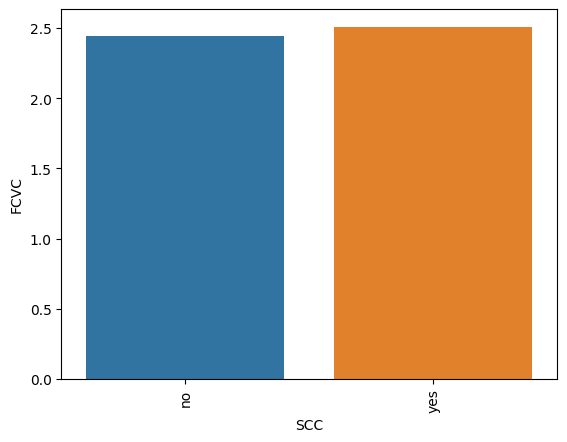

   SCC       NCP
0   no  2.760467
1  yes  2.786620


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


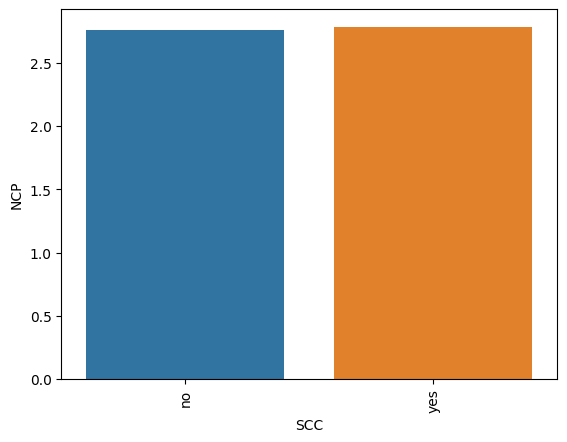

   SCC      CH2O
0   no  2.032989
1  yes  1.925100


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


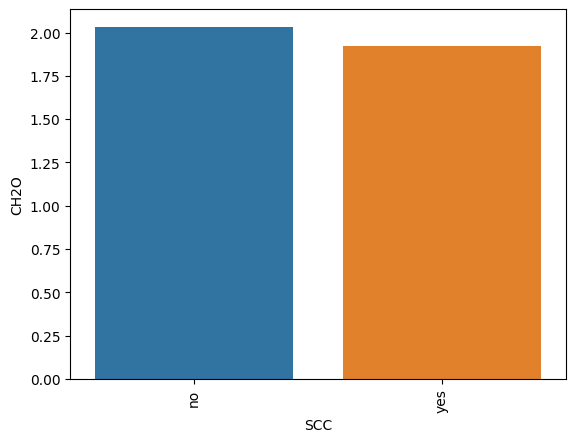

   SCC       FAF
0   no  0.972158
1  yes  1.261890


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


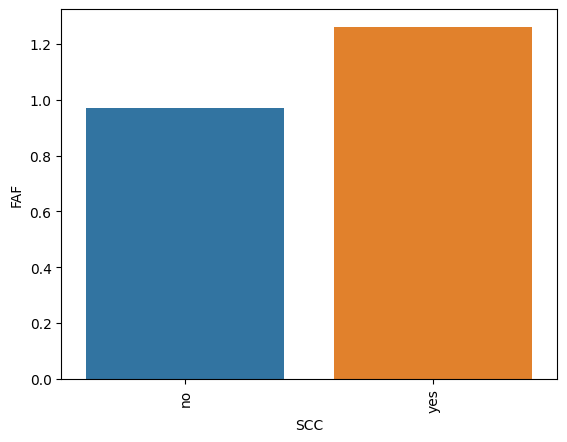

   SCC       TUE
0   no  0.617638
1  yes  0.590990


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


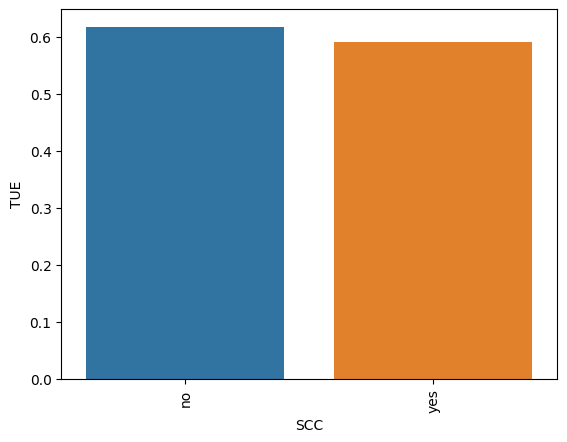

         CALC            id
0  Frequently   9882.536862
1   Sometimes  10388.274194
2          no  10400.794499


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


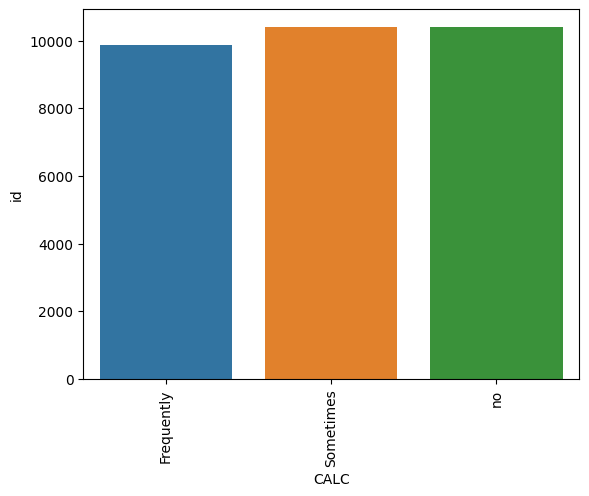

         CALC        Age
0  Frequently  25.111771
1   Sometimes  24.013670
2          no  23.210167


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


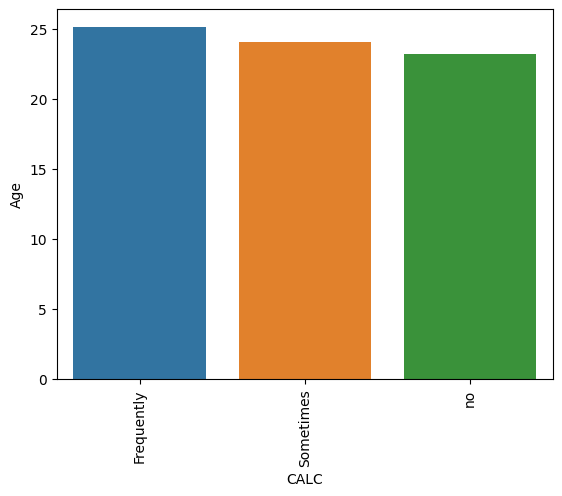

         CALC    Height
0  Frequently  1.720829
1   Sometimes  1.703879
2          no  1.687532


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


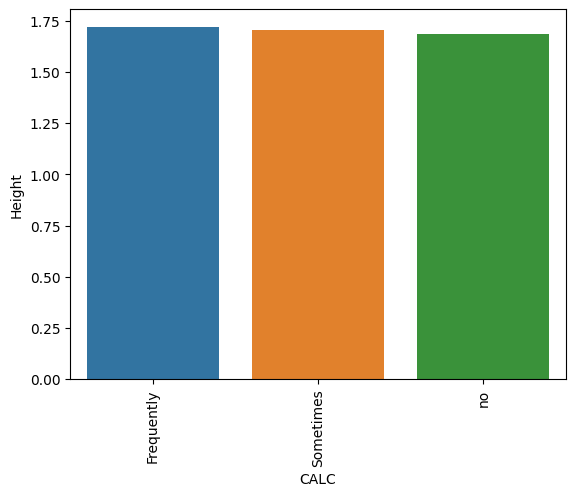

         CALC     Weight
0  Frequently  80.054463
1   Sometimes  92.168046
2          no  76.200213


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


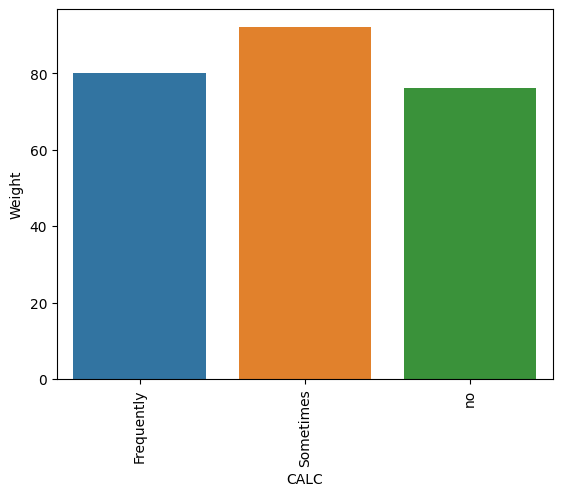

         CALC      FCVC
0  Frequently  2.324700
1   Sometimes  2.499239
2          no  2.302705


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


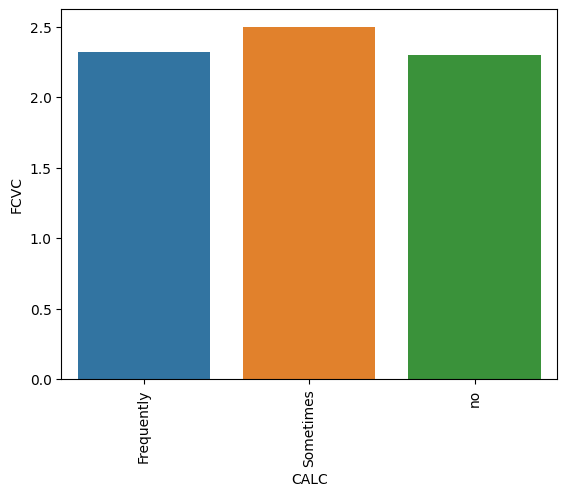

         CALC       NCP
0  Frequently  2.746523
1   Sometimes  2.808140
2          no  2.626261


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


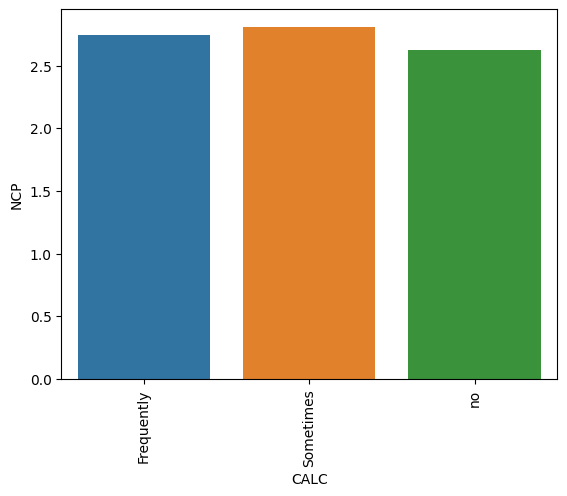

         CALC      CH2O
0  Frequently  2.025352
1   Sometimes  2.062558
2          no  1.933131


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


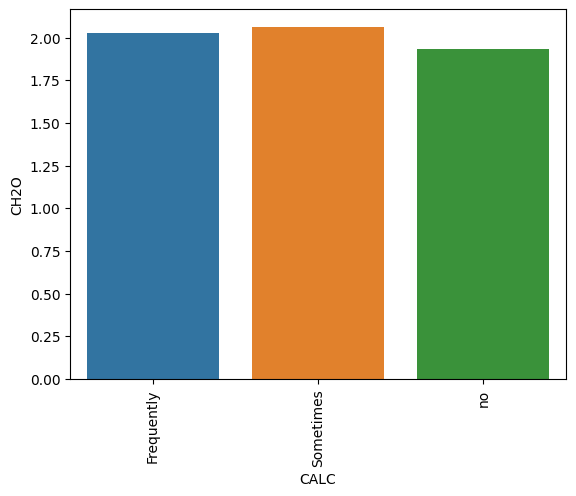

         CALC       FAF
0  Frequently  1.250337
1   Sometimes  0.913605
2          no  1.153069


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


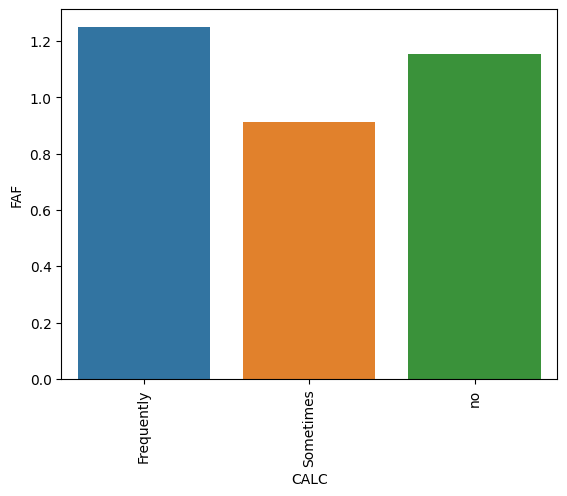

         CALC       TUE
0  Frequently  0.698048
1   Sometimes  0.579694
2          no  0.716577


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


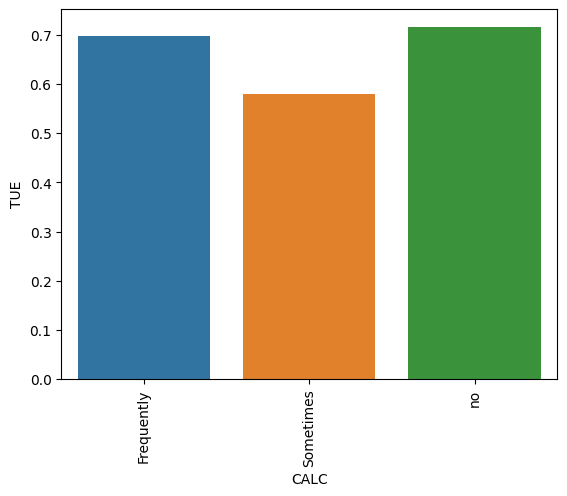

                  MTRANS            id
0             Automobile  10212.142049
1                   Bike   9763.031250
2              Motorbike   8639.368421
3  Public_Transportation  10416.391502
4                Walking  10467.141328


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


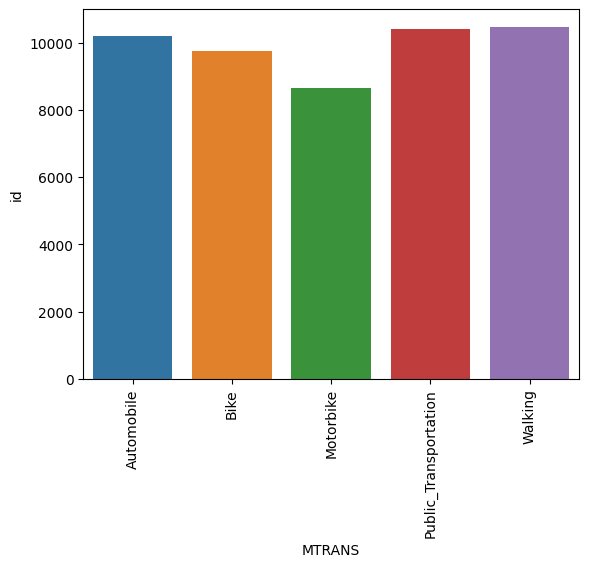

                  MTRANS        Age
0             Automobile  31.443752
1                   Bike  24.767163
2              Motorbike  25.668603
3  Public_Transportation  22.308432
4                Walking  20.893358


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


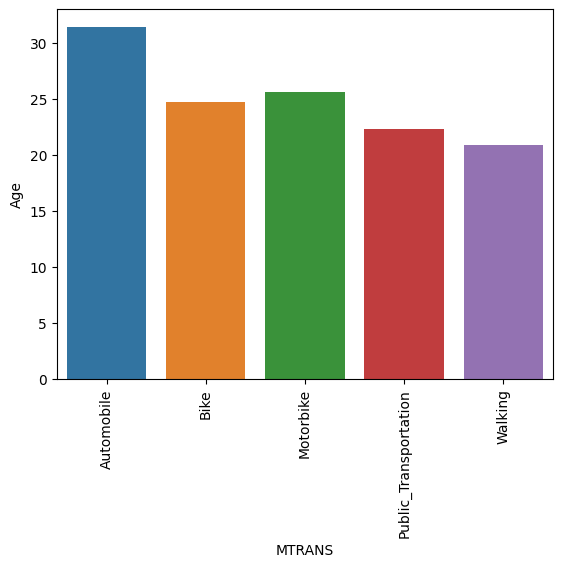

                  MTRANS    Height
0             Automobile  1.710800
1                   Bike  1.730689
2              Motorbike  1.705087
3  Public_Transportation  1.697288
4                Walking  1.723567


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


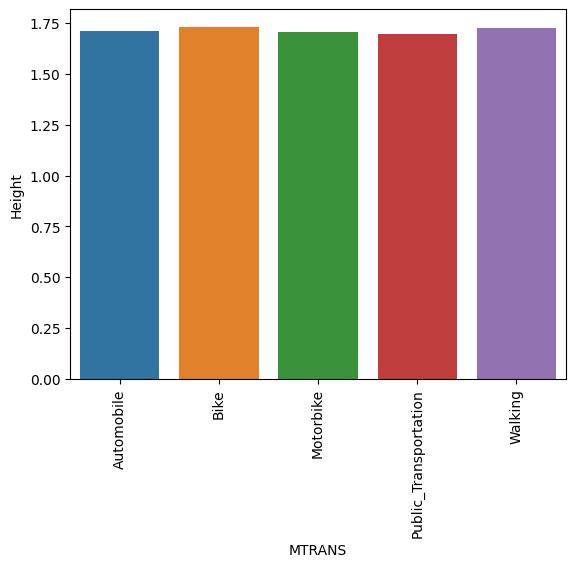

                  MTRANS     Weight
0             Automobile  87.766698
1                   Bike  73.278918
2              Motorbike  73.635865
3  Public_Transportation  88.457081
4                Walking  70.621798


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


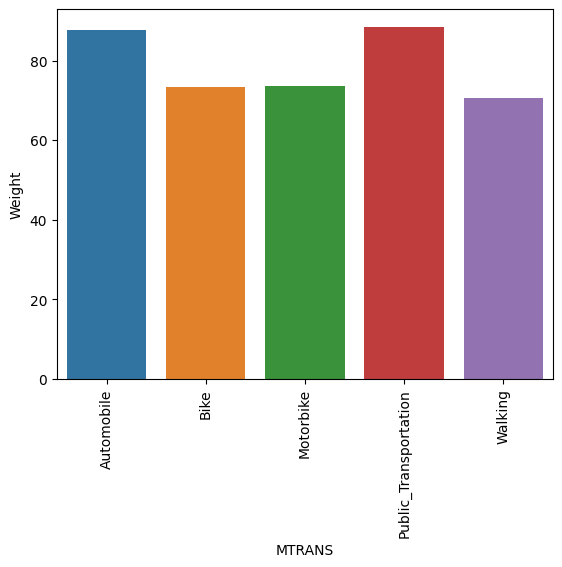

                  MTRANS      FCVC
0             Automobile  2.333346
1                   Bike  2.281250
2              Motorbike  2.529631
3  Public_Transportation  2.470496
4                Walking  2.423611


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


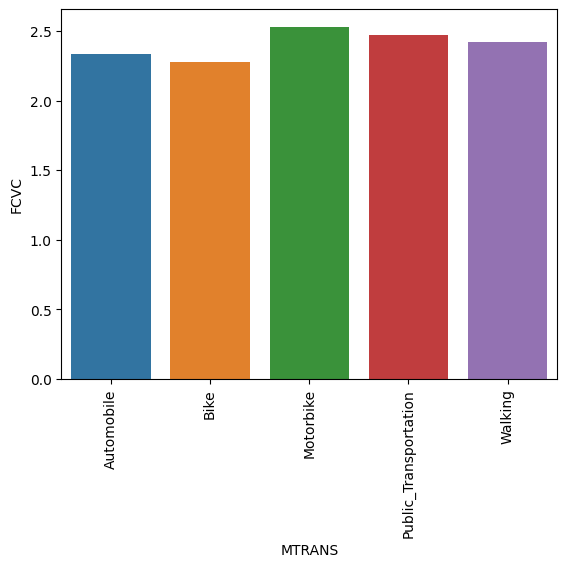

                  MTRANS       NCP
0             Automobile  2.772945
1                   Bike  2.812500
2              Motorbike  2.841479
3  Public_Transportation  2.752663
4                Walking  2.973207


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


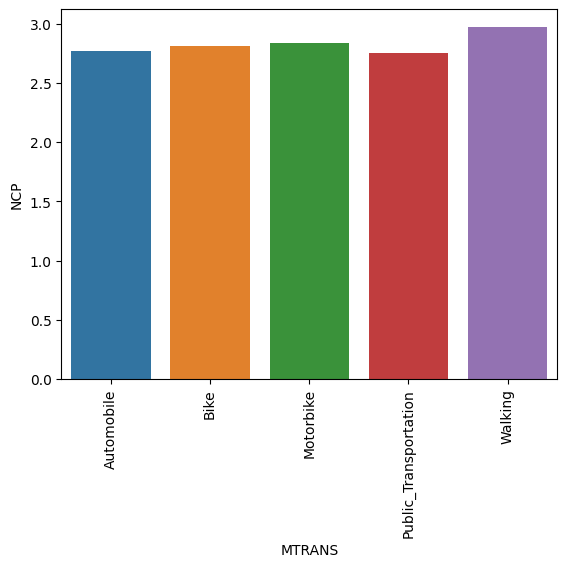

                  MTRANS      CH2O
0             Automobile  1.933101
1                   Bike  2.283747
2              Motorbike  2.132525
3  Public_Transportation  2.047307
4                Walking  2.093272


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


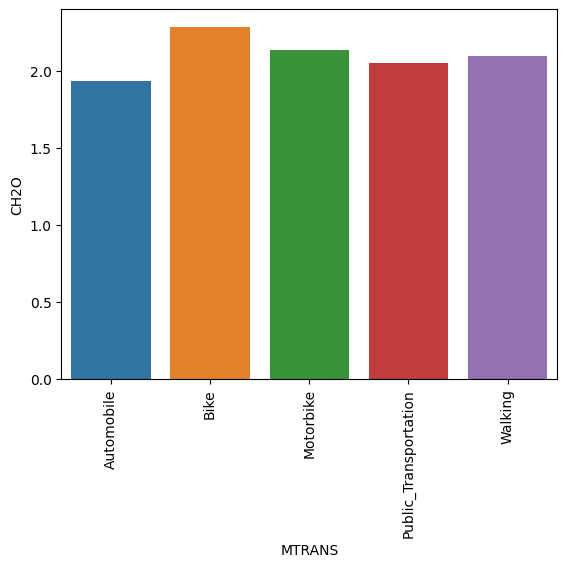

                  MTRANS       FAF
0             Automobile  0.971773
1                   Bike  1.406250
2              Motorbike  1.136068
3  Public_Transportation  0.963899
4                Walking  1.653301


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


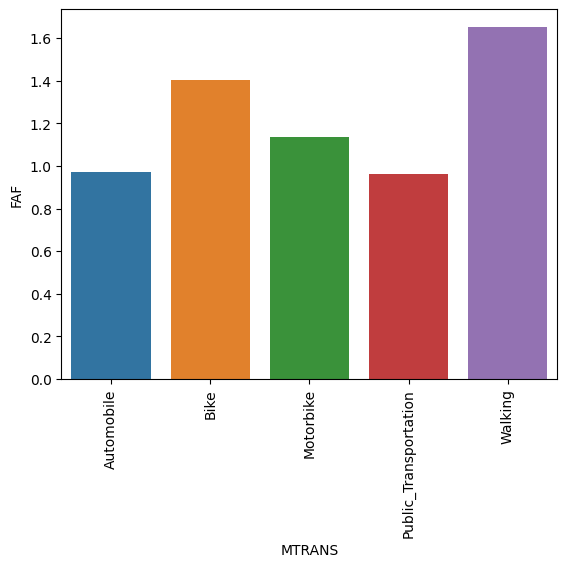

                  MTRANS       TUE
0             Automobile  0.379939
1                   Bike  0.406250
2              Motorbike  0.434945
3  Public_Transportation  0.661556
4                Walking  0.837285


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


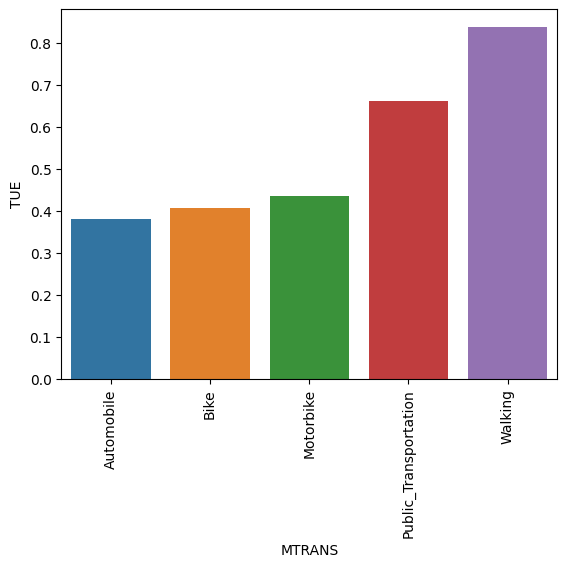

            NObeyesdad            id
0  Insufficient_Weight  10388.804598
1        Normal_Weight  10136.834523
2       Obesity_Type_I  10170.039519
3      Obesity_Type_II  10614.992303
4     Obesity_Type_III  10507.706871
5   Overweight_Level_I  10271.952204
6  Overweight_Level_II  10494.728390


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


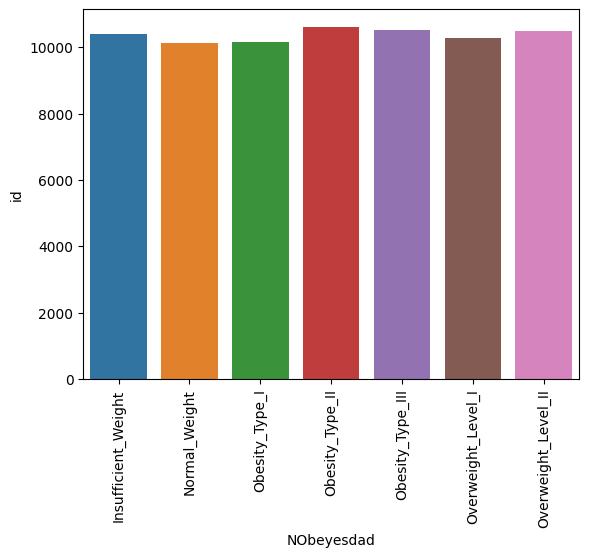

            NObeyesdad        Age
0  Insufficient_Weight  19.336502
1        Normal_Weight  20.801388
2       Obesity_Type_I  25.023615
3      Obesity_Type_II  27.707128
4     Obesity_Type_III  24.126847
5   Overweight_Level_I  23.045197
6  Overweight_Level_II  26.032084


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


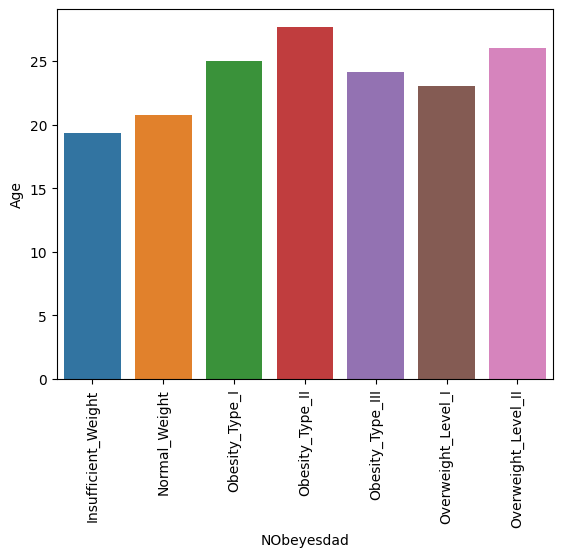

            NObeyesdad    Height
0  Insufficient_Weight  1.683693
1        Normal_Weight  1.670744
2       Obesity_Type_I  1.693509
3      Obesity_Type_II  1.782715
4     Obesity_Type_III  1.676007
5   Overweight_Level_I  1.686880
6  Overweight_Level_II  1.706163


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


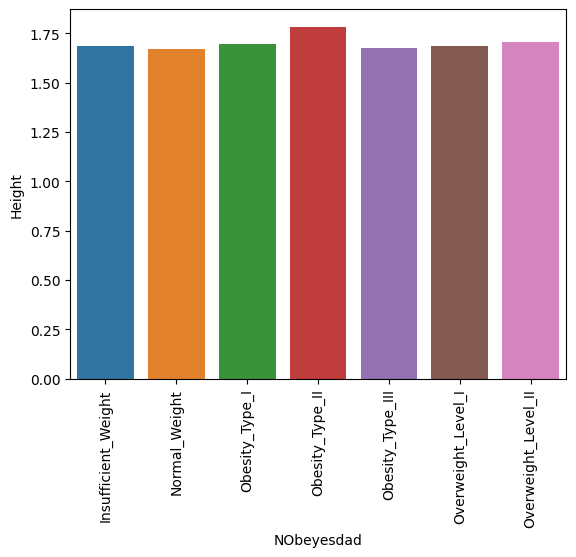

            NObeyesdad      Weight
0  Insufficient_Weight   49.860773
1        Normal_Weight   61.533289
2       Obesity_Type_I   92.371026
3      Obesity_Type_II  115.995914
4     Obesity_Type_III  117.697452
5   Overweight_Level_I   74.228266
6  Overweight_Level_II   82.085513


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


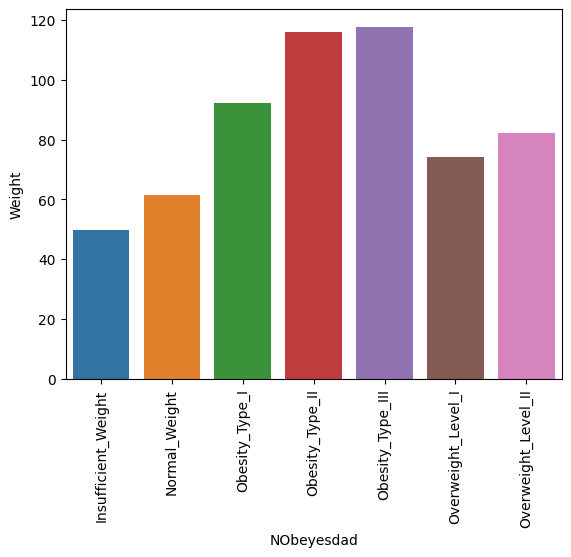

            NObeyesdad      FCVC
0  Insufficient_Weight  2.479756
1        Normal_Weight  2.372249
2       Obesity_Type_I  2.097052
3      Obesity_Type_II  2.425227
4     Obesity_Type_III  3.000000
5   Overweight_Level_I  2.256583
6  Overweight_Level_II  2.224499


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


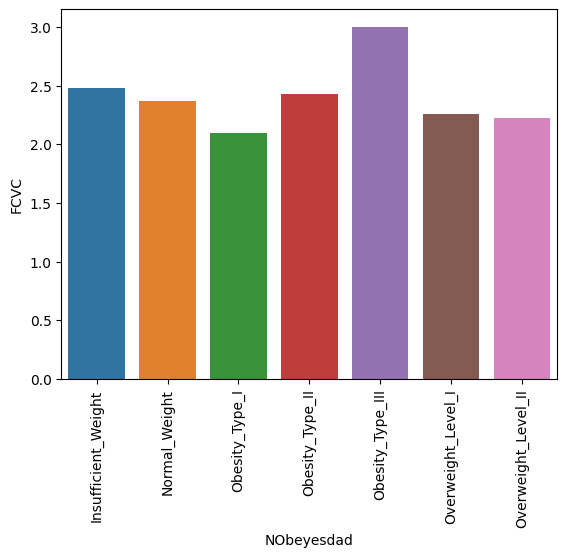

            NObeyesdad       NCP
0  Insufficient_Weight  2.919554
1        Normal_Weight  2.889552
2       Obesity_Type_I  2.454551
3      Obesity_Type_II  2.798439
4     Obesity_Type_III  2.999950
5   Overweight_Level_I  2.528178
6  Overweight_Level_II  2.594109


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


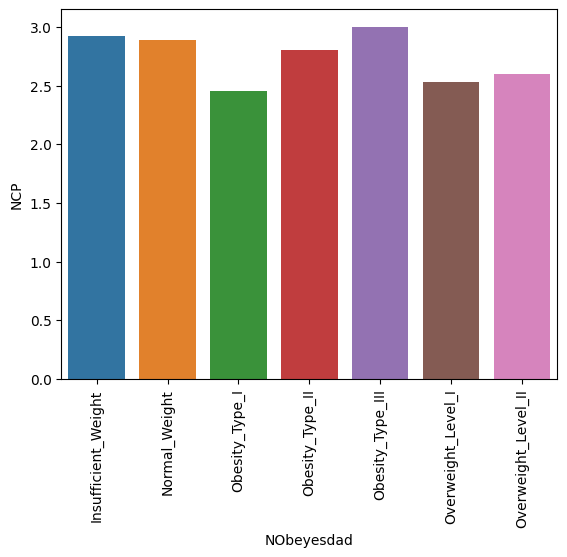

            NObeyesdad      CH2O
0  Insufficient_Weight  1.744163
1        Normal_Weight  1.806204
2       Obesity_Type_I  2.129783
3      Obesity_Type_II  1.985064
4     Obesity_Type_III  2.332338
5   Overweight_Level_I  2.069366
6  Overweight_Level_II  2.004470


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


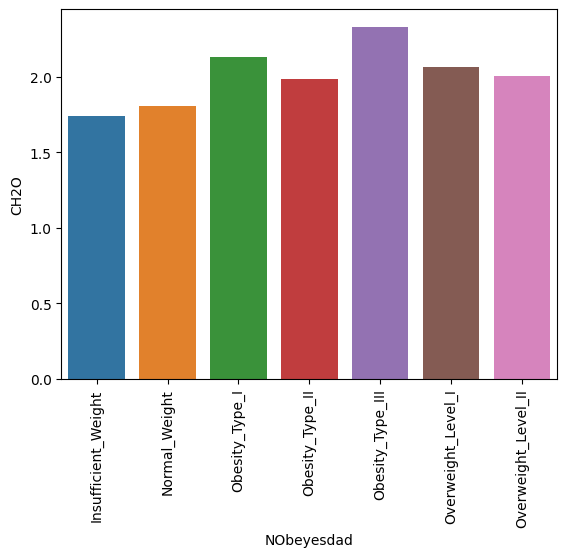

            NObeyesdad       FAF
0  Insufficient_Weight  1.201782
1        Normal_Weight  1.189580
2       Obesity_Type_I  0.922710
3      Obesity_Type_II  1.029579
4     Obesity_Type_III  0.549225
5   Overweight_Level_I  1.134657
6  Overweight_Level_II  1.060895


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


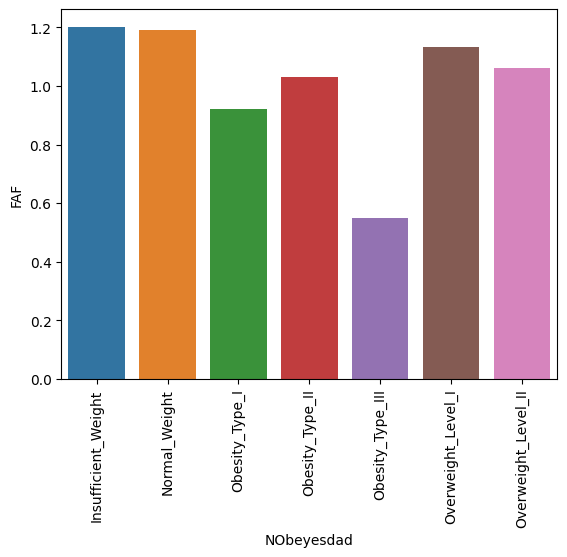

            NObeyesdad       TUE
0  Insufficient_Weight  0.802901
1        Normal_Weight  0.630216
2       Obesity_Type_I  0.739477
3      Obesity_Type_II  0.415601
4     Obesity_Type_III  0.548849
5   Overweight_Level_I  0.557014
6  Overweight_Level_II  0.697984


C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_22312\1692116298.py:6: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())


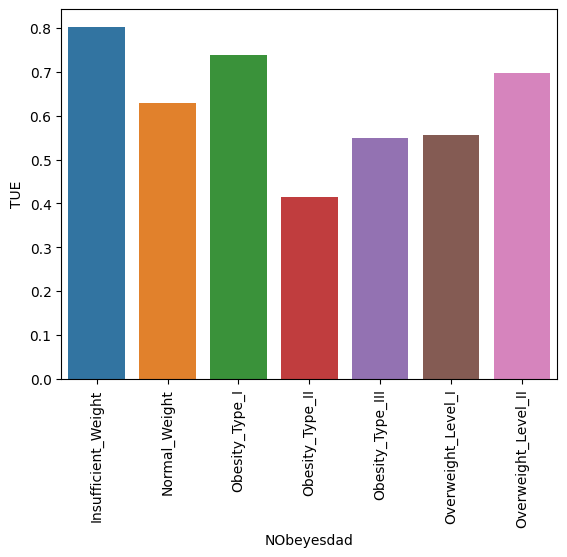

In [73]:
for i in data.select_dtypes("object").columns:
    for j in data.select_dtypes(exclude="object").columns:
        if i!=j:
            a=data.groupby(i)[j].mean().reset_index()
            print(a)
            sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
            plt.xticks(rotation=90)
            plt.show()

<Axes: >

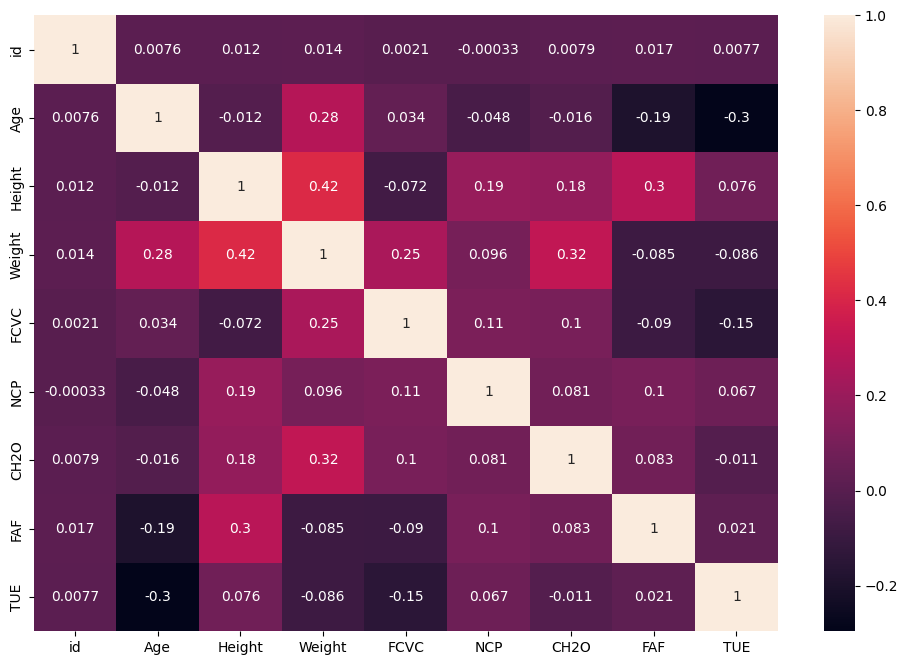

In [75]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True),annot=True)

In [42]:
# Create a column transformer to handle categorical and numerical pipelines
preprocessor_1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Split the data into training and testing sets

In [43]:
preprocessor_1

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object'))])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target variable

In [45]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to categorical one-hot encoding
y_train_ohe = to_categorical(y_train_encoded)
y_test_ohe = to_categorical(y_test_encoded)

In [46]:
y_train_ohe.shape

(16606, 7)

In [47]:
# Fit the model with preprocessed data
X_train_transformed = preprocessor_1.fit_transform(X_train)
X_test_transformed = preprocessor_1.transform(X_test)



In [48]:
X_train_transformed.shape

(16606, 31)

In [49]:
# Define the Keras model
model_2 = Sequential()
model_2.add(Dense(64, input_shape=(X_train_transformed.shape[1],), activation='sigmoid'))
model_2.add(Dense(64, activation='sigmoid'))
model_2.add(Dense(7, activation='softmax'))  # 7 for the number of unique classes

# Compile the model
model_2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\Ganji Bhaskar\Music\ml\mlp\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
history=model_2.fit(X_train_transformed, y_train_ohe, epochs=600, batch_size=32, validation_split=0.2)

Epoch 1/600
416/416 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1905 - loss: 1.9390 - val_accuracy: 0.1933 - val_loss: 1.9063
Epoch 2/600
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1920 - loss: 1.9036 - val_accuracy: 0.1933 - val_loss: 1.8782
Epoch 3/600
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2077 - loss: 1.8649 - val_accuracy: 0.3022 - val_loss: 1.8385
Epoch 4/600
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2690 - loss: 1.8254 - val_accuracy: 0.3043 - val_loss: 1.7850
Epoch 5/600
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3185 - loss: 1.7649 - val_accuracy: 0.4025 - val_loss: 1.7110
Epoch 6/600
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3954 - loss: 1.6897 - val_accuracy: 0.4323 - val_loss: 1.6163
Epoch 7/600
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4367 - loss: 1.5910 - val_accuracy: 0.4380 - val_loss: 1.5094
Epoch 8/600
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4709 - loss: 1.4896 - val_accu

In [51]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 6,663 (26.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [52]:
history.history

{'accuracy': [0.19451972842216492,
  0.20039144158363342,
  0.22131888568401337,
  0.2762722074985504,
  0.34101173281669617,
  0.4001806676387787,
  0.4479825496673584,
  0.4842667877674103,
  0.5265733003616333,
  0.5445649027824402,
  0.576784074306488,
  0.6017765998840332,
  0.6189400553703308,
  0.63309246301651,
  0.6463414430618286,
  0.6588376760482788,
  0.6702800393104553,
  0.6812707185745239,
  0.6918849945068359,
  0.7049081325531006,
  0.7158235311508179,
  0.7229750156402588,
  0.7359982132911682,
  0.7455585598945618,
  0.7521830797195435,
  0.7570009231567383,
  0.7629479169845581,
  0.7670882344245911,
  0.7719060778617859,
  0.7783799767494202,
  0.7817675471305847,
  0.7863595485687256,
  0.791252613067627,
  0.7914784550666809,
  0.7953929305076599,
  0.7999096512794495,
  0.8026196956634521,
  0.8052544593811035,
  0.807437539100647,
  0.8091689348220825,
  0.8126317262649536,
  0.8135350942611694,
  0.8151912093162537,
  0.8179765343666077,
  0.8179765343666077,

In [53]:
history.history["val_accuracy"]

[0.19325707852840424,
 0.19325707852840424,
 0.30222758650779724,
 0.30433472990989685,
 0.40246838331222534,
 0.43226972222328186,
 0.43798917531967163,
 0.5177603960037231,
 0.5228778123855591,
 0.5722456574440002,
 0.587898850440979,
 0.6167970895767212,
 0.6183022260665894,
 0.6381697654724121,
 0.6420831084251404,
 0.6423841118812561,
 0.6634557247161865,
 0.6694762110710144,
 0.6893437504768372,
 0.6932570934295654,
 0.6941601634025574,
 0.7191451191902161,
 0.7308850288391113,
 0.7323901057243347,
 0.7465382218360901,
 0.7462372183799744,
 0.7522577047348022,
 0.763696551322937,
 0.7624924778938293,
 0.7754364609718323,
 0.7850692272186279,
 0.779951810836792,
 0.7805538773536682,
 0.7937989234924316,
 0.7904876470565796,
 0.7889825701713562,
 0.7992173433303833,
 0.8076459765434265,
 0.8034316897392273,
 0.8085490465164185,
 0.8100541830062866,
 0.8112582564353943,
 0.8178808093070984,
 0.8118603229522705,
 0.8184828162193298,
 0.8196869492530823,
 0.8293197154998779,
 0.820590

In [54]:
import matplotlib.pyplot as plt

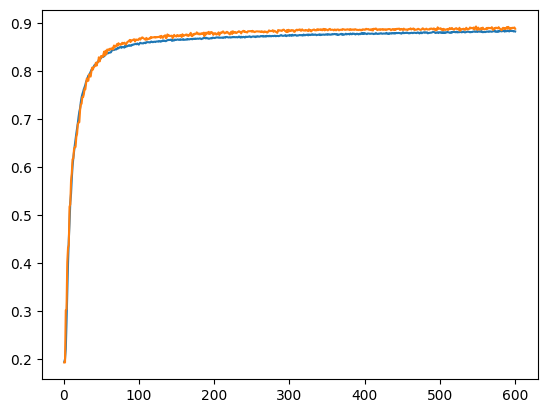

In [55]:
plt.plot(range(1,601),history.history["accuracy"],label="train_loss")
plt.plot(range(1,601),history.history["val_accuracy"],label="val_loss")
plt.show()

In [56]:
model_2.predict(X_test_transformed)

130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[5.92277793e-15, 1.00060493e-09, 2.03752094e-07, ...,
        8.64200818e-04, 1.15022843e-03, 9.97984886e-01],
       [8.67834897e-05, 6.11091703e-02, 8.01074564e-01, ...,
        8.00458342e-03, 5.51590492e-05, 4.85839837e-06],
       [5.57909004e-07, 6.33980962e-04, 5.02686538e-02, ...,
        7.09569514e-01, 8.06691169e-05, 4.51334007e-03],
       ...,
       [1.04420215e-08, 1.70647563e-05, 1.91975161e-02, ...,
        9.04687226e-01, 4.34014655e-04, 5.89100564e-05],
       [8.90586307e-06, 6.85693230e-03, 3.84563118e-01, ...,
        5.76006770e-02, 9.67168622e-03, 9.97129291e-07],
       [4.87565603e-06, 6.30697329e-03, 5.55562794e-01, ...,
        4.64385971e-02, 1.17054768e-03, 4.28633666e-06]], dtype=float32)

In [57]:
model_2

<Sequential name=sequential_1, built=True>

In [58]:
predicted_2=np.argmax(model_2.predict(X_test_transformed),axis=1)

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [59]:
import numpy as np

In [60]:
predicted_2

array([6, 2, 4, ..., 4, 3, 2], dtype=int64)